In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils as u
import pandas as pd

from visualization import papermode
papermode(plt)

In [2]:
radius = 0.3

In [3]:
abbr = "P11"
filename = u.get_filename(abbr)
basename = u.get_basename(filename)
rundir = u.get_rundir(basename)
merged_path = rundir / "simple_motor"

figs_path = u.get_figdir(basename) / "simple_motor"

simple_paths = {
    "left": f"{basename}_simpleL.csv",
    "right": f"{basename}_simpleR.csv",
}

motor = {sd: pd.read_csv(merged_path / path) for sd, path in simple_paths.items()}

power_paths = {
    "left": f"{basename}_powerL.csv",
    "right": f"{basename}_powerR.csv",
}
##
power = {sd: pd.read_csv(merged_path / path) for sd, path in power_paths.items()}

In [4]:
# calib_switch_path = rundir / "doughnut" / f"{basename}_doughnut_calib_switch.csv"
# calib_df = pd.read_csv(calib_switch_path)
# calib_df.rename(inplace=True, columns={"/calib_switch": "calib_switch"})
# st_time = calib_df.loc[calib_df.calib_switch].time.iloc[0]
# en_time = calib_df.loc[~calib_df.calib_switch].time.iloc[0]

# print(
#     power["left"].time.min(),
#     power["right"].time.min(),
#     st_time,
#     en_time,
#     power["left"].time.max(),
#     power["right"].time.max(),
#     sep="\n",
# )

# power["left"] = power["left"].loc[power["left"].time <= en_time]
# power["left"] = power["left"].loc[power["left"].time >= st_time]
# power["right"] = power["right"].loc[power["right"].time <= en_time]
# power["right"] = power["right"].loc[power["right"].time >= st_time]

# power["left"].index = pd.RangeIndex(len(power["left"].index))
# power["right"].index = pd.RangeIndex(len(power["right"].index))


In [5]:
power["right"].rename(
    columns={
        "I_R": "I",
        "V_R": "V",
        "P_R": "P",
        "wR": "w",
    },
    errors="raise",
    inplace=True,
)
power["left"].rename(
    columns={
        "I_L": "I",
        "V_L": "V",
        "P_L": "P",
        "wL": "w",
    },
    errors="raise",
    inplace=True,
)
motor["right"].rename(
    columns={
        "I_R": "I",
        "V_R": "V",
        "P_R": "P",
        "wR": "w",
    },
    errors="raise",
    inplace=True,
)
motor["left"].rename(
    columns={
        "I_L": "I",
        "V_L": "V",
        "P_L": "P",
        "wL": "w",
    },
    errors="raise",
    inplace=True,
)

In [6]:
print(motor["left"].head())
print(motor["right"].head())

           time    w           P          V          I
0  1.662066e+09  0.0 -669.362488  50.987174 -13.405319
1  1.662066e+09  0.0 -669.294654  50.987112 -13.403960
2  1.662066e+09  0.0 -669.253633  50.987074 -13.403139
3  1.662066e+09  0.0 -669.211465  50.987036 -13.402294
4  1.662066e+09  0.0 -669.180069  50.987008 -13.401665
           time    w          P          V         I
0  1.662066e+09  0.0  25.436903  51.529508  0.498713
1  1.662066e+09  0.0  25.436381  51.529462  0.498703
2  1.662066e+09  0.0  25.436009  51.529429  0.498696
3  1.662066e+09  0.0  25.435243  51.529362  0.498681
4  1.662066e+09  0.0  25.434682  51.529313  0.498670


In [7]:
power["left"].P.max(), motor["left"].P.max()

(2519.12109375, 2516.242573780186)

(-10.0, 5000.0)

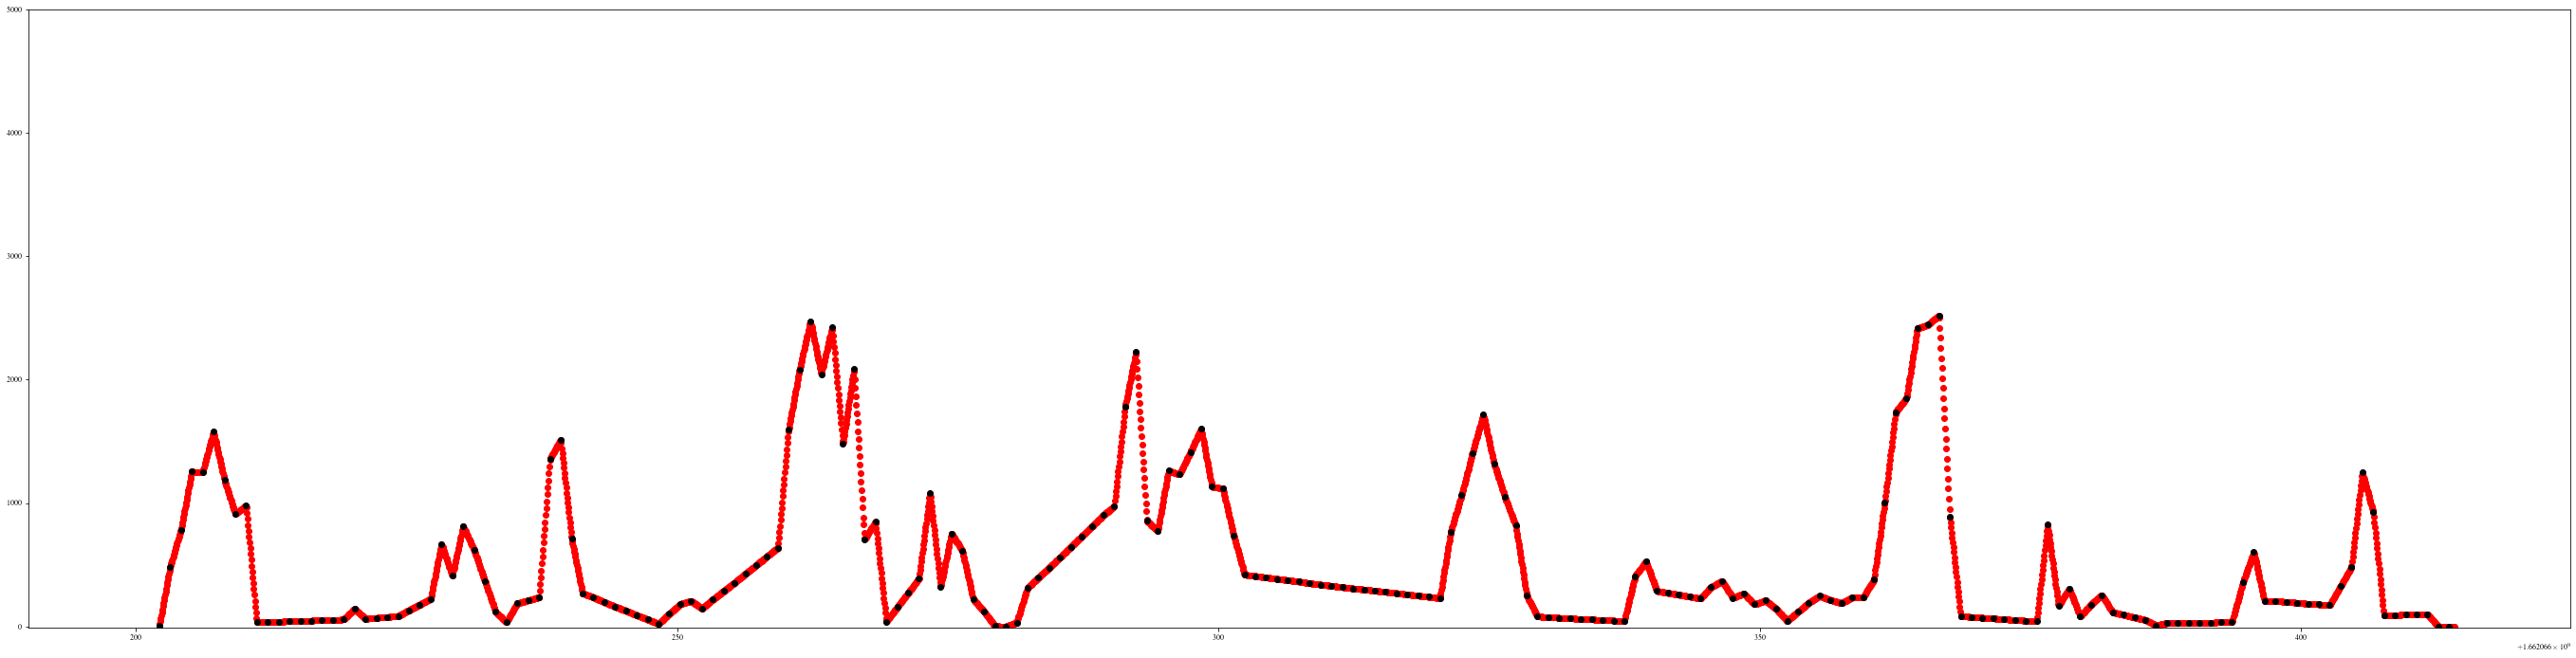

In [8]:
fig, ax1 = plt.subplots(figsize=(48,12))
ax1.plot(motor["left"].time, motor["left"].P, "ro", label="interpolated")
ax1.plot(power["left"].time, power["left"].P, "ko", label="original")
ax1.set_ylim((-10, 5000))

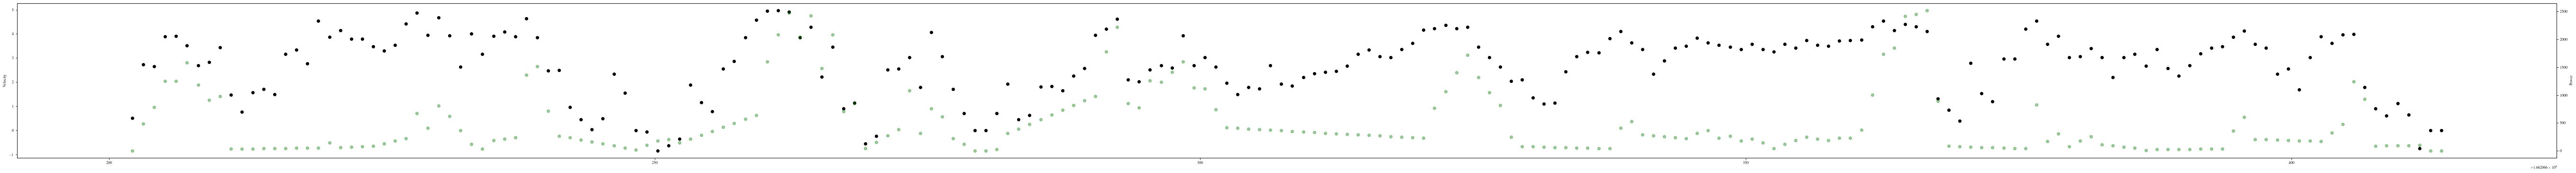

In [9]:
fig, ax1 = plt.subplots(figsize=(96,6))
# ax1.plot(motor["left"].time, motor["left"].wL, "ro", label="interpolated")
ax2 = ax1.twinx()
ax1.set_ylabel("Velocity")
ax2.set_ylabel("Power")
ax2.plot(power["left"].time, power["left"].P, "go", label="power", alpha=0.4)
ax1.plot(power["left"].time, power["left"].w, "ko", label="original")
# ax1.set_ylim((-10, 5000))

In [10]:
print(len(power["left"].w), len(motor["left"].w), len(power["left"].P))
print(power["left"].w.count(), power["left"].P.count())
print(motor["left"].w.count())

212 4282 212
212 212
4282


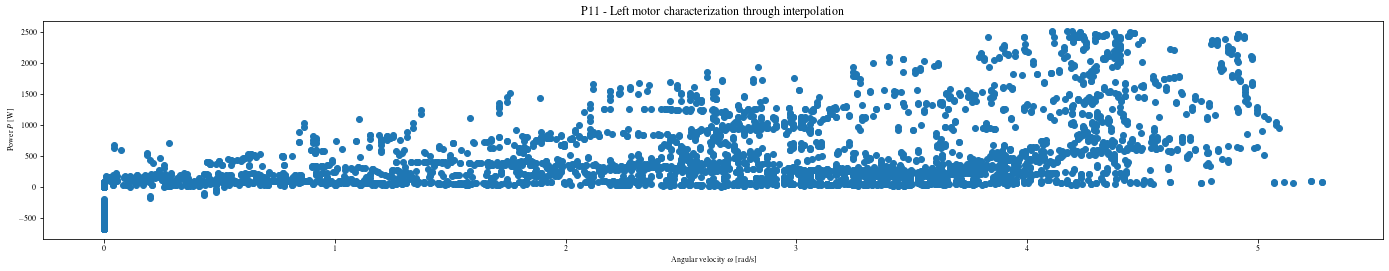

In [11]:
# plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(motor["left"].w.abs(), motor["left"].P, "o")
ax.set_title(f"{abbr} - Left motor characterization through interpolation")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Power $P$ [W]")

fig.savefig(figs_path / f"{abbr}_simpleL.jpg")

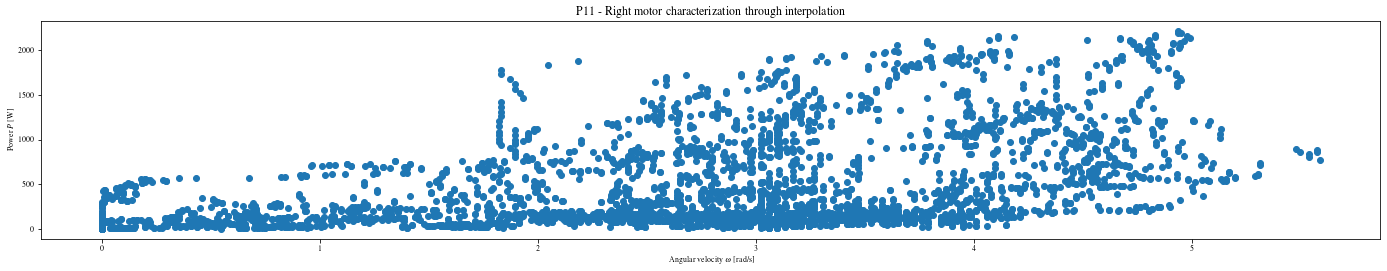

In [12]:
# plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(motor["right"].w.abs(), motor["right"].P, "o")
ax.set_title(f"{abbr} - Right motor characterization through interpolation")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Power $P$ [W]")

fig.savefig(figs_path / f"{abbr}_simpleR.jpg")

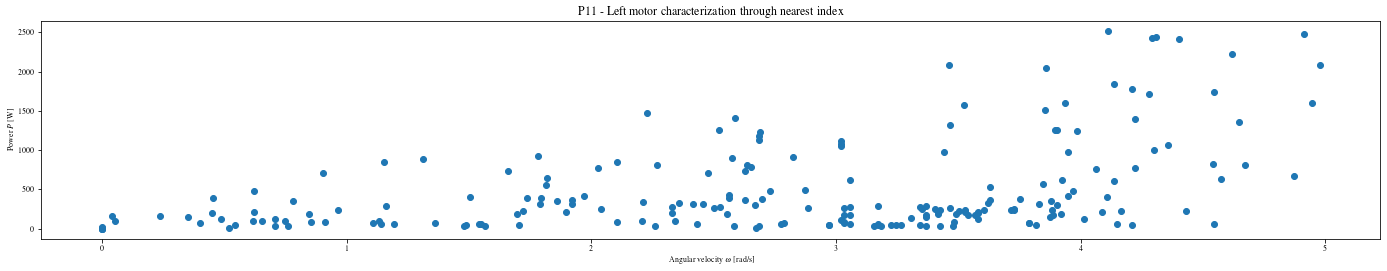

In [13]:
# plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(power["left"].w.abs(), power["left"].P, "o")
ax.set_title(f"{abbr} - Left motor characterization through nearest index")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Power $P$ [W]")

fig.savefig(figs_path / f"{abbr}_powerL.jpg")


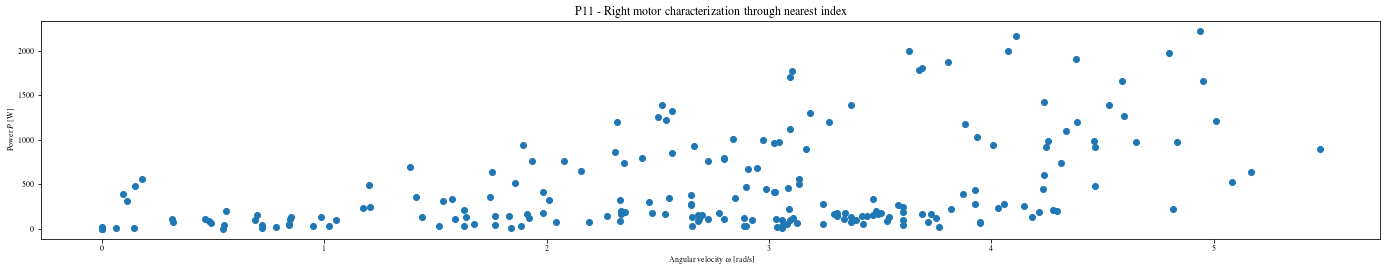

In [14]:
# plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(power["right"].w.abs(), power["right"].P, "o")
ax.set_title(f"{abbr} - Right motor characterization through nearest index")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Power $P$ [W]")

fig.savefig(figs_path / f"{abbr}_powerR.jpg")

Text(0, 0.5, 'Derivative of current (A/s)')

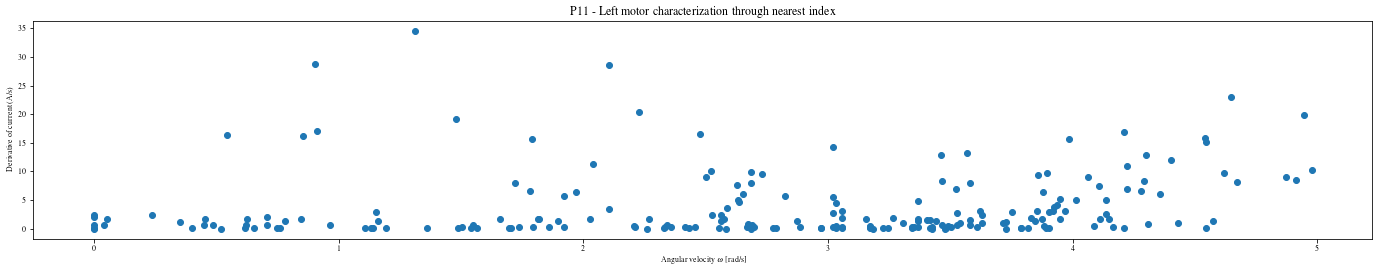

In [15]:
power["left"]["dt"] = power["left"].time.diff()
power["left"]["dt"].iloc[0] = power["left"]["dt"].iloc[1]
power["left"]["dI"] = power["left"].I.diff().fillna(0)
power["left"]["dIdt"] = power["left"].dI / power["left"].dt


fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(power["left"].w.abs(), power["left"].dIdt.abs(), "o")
ax.set_title(f"{abbr} - Left motor characterization through nearest index")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Derivative of current (A/s)")

Text(0, 0.5, 'Derivative of current (A/s)')

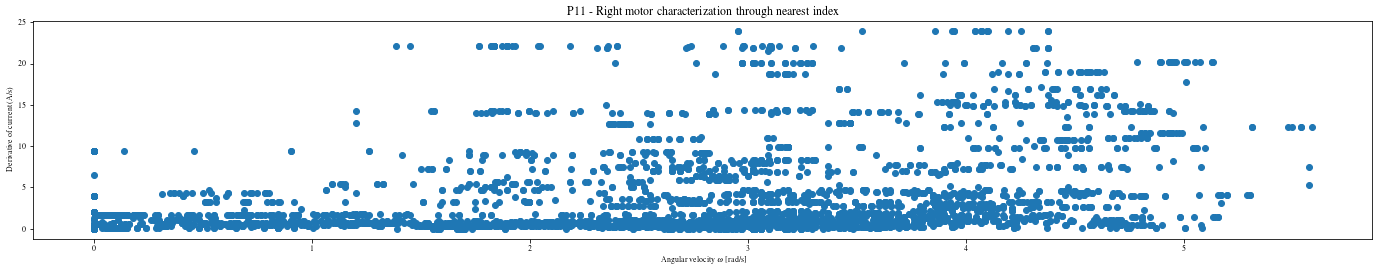

In [16]:
motor["right"]["dt"] = motor["right"].time.diff()
motor["right"]["dt"].iloc[0] = motor["right"]["dt"].iloc[1]
motor["right"]["dI"] = motor["right"].I.diff().fillna(0)
motor["right"]["dIdt"] = motor["right"].dI / motor["right"].dt


fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(motor["right"].w.abs(), motor["right"].dIdt.abs(), "o")
ax.set_title(f"{abbr} - Right motor characterization through nearest index")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Derivative of current (A/s)")

Text(0, 0.5, 'Volage [V]')

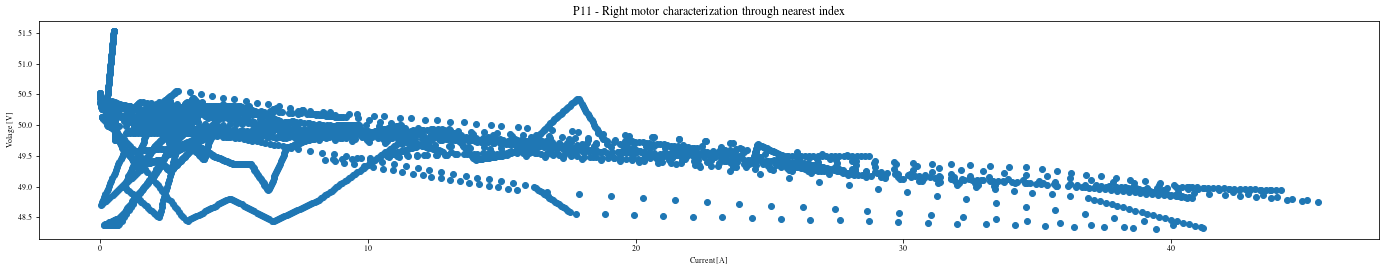

In [17]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(motor["right"].I, motor["right"].V, "o")
ax.set_title(f"{abbr} - Right motor characterization through nearest index")
ax.set_xlabel("Current [A]")
ax.set_ylabel("Volage [V]")

Text(0, 0.5, 'Voltage [V]')

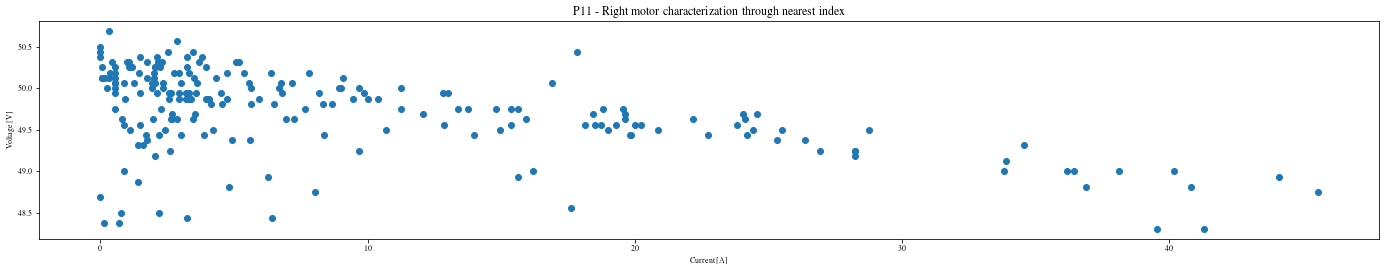

In [18]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(power["right"].I, power["right"].V, "o")
ax.set_title(f"{abbr} - Right motor characterization through nearest index")
ax.set_xlabel("Current [A]")
ax.set_ylabel("Voltage [V]")

Text(0.5, 0.98, 'P11 - Motor torques')

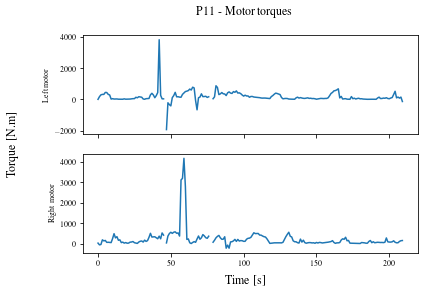

In [19]:
power["left"]["TMec"] = power["left"].P / power["left"].w
power["right"]["TMec"] = power["right"].P / power["right"].w

fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
power["left"].TMec.plot(ax=ax1)
power["right"].TMec.plot(ax=ax2)

# ax1.set_ylim((-1500, 4500))
# ax2.set_ylim((-4500, 1500))

ax1.set_ylabel("Left motor")
ax2.set_ylabel("Right motor")

fig.supylabel("Torque [N.m]", x=-0.05)
fig.supxlabel("Time [s]")

fig.suptitle(f"{abbr} - Motor torques")

Text(0.5, 0.98, 'P11 - Traction forces')

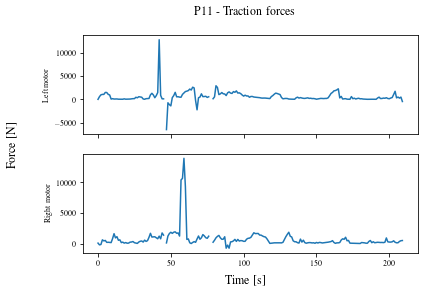

In [20]:
power["left"]["Fmec"] = power["left"].TMec / radius
power["right"]["Fmec"] = power["right"].TMec / radius

fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
power["left"].Fmec.plot(ax=ax1)
power["right"].Fmec.plot(ax=ax2)

# ax1.set_ylim((-5000, 5000))
# ax2.set_ylim((-5000, 5000))

ax1.set_ylabel("Left motor")
ax2.set_ylabel("Right motor")

fig.supylabel("Force [N]", x=-0.05)
fig.supxlabel("Time [s]")

fig.suptitle(f"{abbr} - Traction forces")

Text(0.5, 0.98, 'P11 - Motor torques vs Speeds')

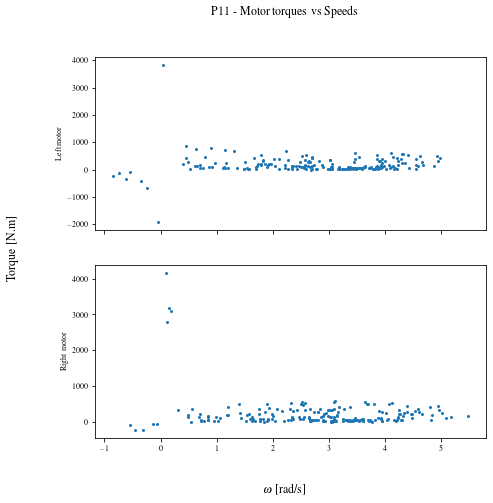

In [21]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2, figsize=(7,7))
ax1.plot(power["left"].w, power["left"].TMec, "o", markersize=2)
ax2.plot(power["right"].w, power["right"].TMec, "o", markersize=2)

# ax1.set_ylim((-2000, 2000))
# ax2.set_ylim((-2000, 2000))

ax1.set_ylabel("Left motor")
ax2.set_ylabel("Right motor")

fig.supylabel("Torque [N.m]", x=-0.05)
fig.supxlabel("$\omega$ [rad/s]")

fig.suptitle(f"{abbr} - Motor torques vs Speeds")

Text(0, 0.5, 'Power')

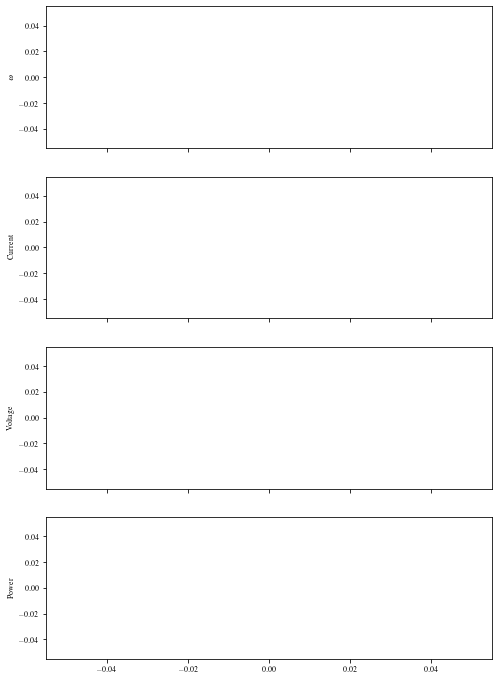

In [22]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

power["right"].w.iloc[500:550].plot(ax=axs[0])
power["right"].I.iloc[500:550].plot(ax=axs[1])
power["right"].V.iloc[500:550].plot(ax=axs[2])
power["right"].P.iloc[500:550].plot(ax=axs[3])

axs[0].set_ylabel("$\omega$")
axs[1].set_ylabel("Current")
axs[2].set_ylabel("Voltage")
axs[3].set_ylabel("Power")


<AxesSubplot:>

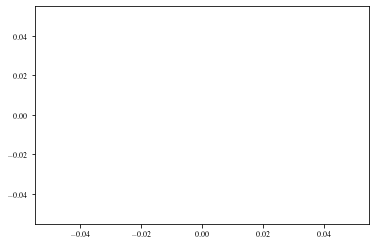

In [23]:
motor["right"].w.iloc[10400:11200].plot()

Text(0, 0.5, 'Power')

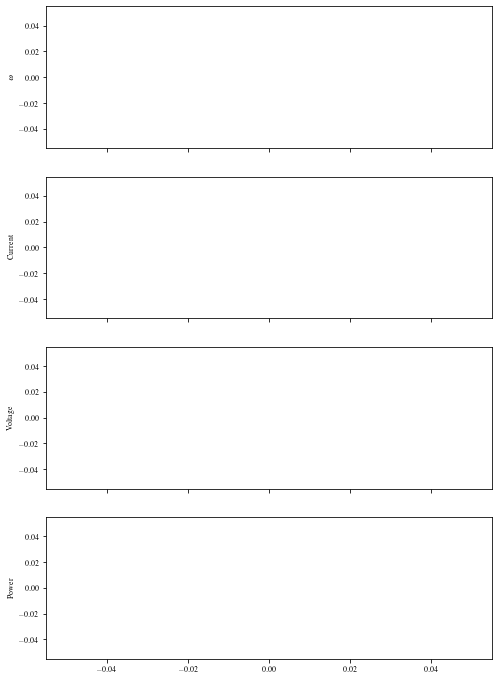

In [24]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

motor["right"].w.iloc[10400:11200].plot(ax=axs[0])
motor["right"].I.iloc[10400:11200].plot(ax=axs[1])
motor["right"].V.iloc[10400:11200].plot(ax=axs[2])
motor["right"].P.iloc[10400:11200].plot(ax=axs[3])

axs[0].set_ylabel("$\omega$")
axs[1].set_ylabel("Current")
axs[2].set_ylabel("Voltage")
axs[3].set_ylabel("Power")